# Air Quality Dataset — Linear Regression Models
### Assignment: Comprehensive Study of Linear Regression Models

## Objective
- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset (AirQualityUCI.csv)

In [19]:
df = pd.read_csv('AirQualityUCI.csv', sep=',', decimal=',')
# Remove trailing empty columns and rows
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(how='all', inplace=True)
display(df.head())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## Data Cleaning

In [20]:
df.columns = df.columns.str.strip()
df.replace(-200, np.nan, inplace=True)

if 'CO(GT)' in df.columns:
    df.dropna(subset=['CO(GT)'], inplace=True)
    print('Success: CO(GT) column found and cleaned.')
    display(df.info())
else:
    print('Available columns:', df.columns.tolist())
    print('Error: CO(GT) column not found. Check if delimiter is ";" or ",".')

Success: CO(GT) column found and cleaned.
<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


None

## Feature Selection

In [21]:
df = df[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'T', 'RH']]
df.dropna(inplace=True)
df.head()

,CO(GT),NOx(GT),C6H6(GT),T,RH
0,2.6,166.0,11.9,13.6,48.9
1,2,103.0,9.4,13.3,47.7
2,2.2,131.0,9.0,11.9,54.0
3,2.2,172.0,9.2,11.0,60.0
4,1.6,131.0,6.5,11.2,59.6


## Correlation Heatmap

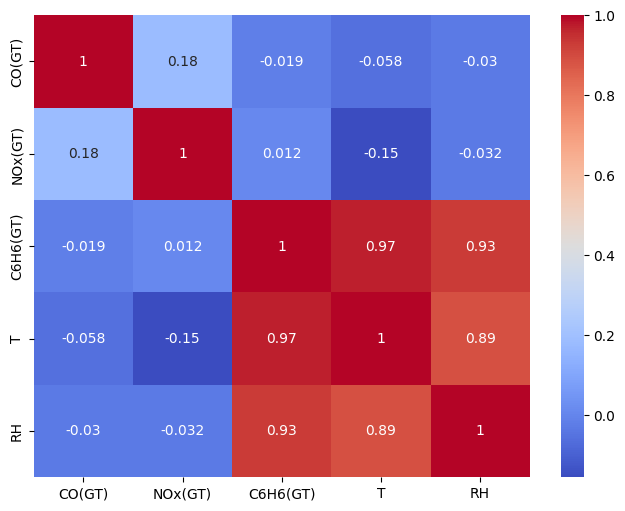

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Simple Linear Regression

In [23]:
X = df[['T']]
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

print("Intercept:", slr.intercept_)
print("Slope:", slr.coef_[0])

Intercept: -9.149867167078662
Slope: -0.057231281296899195


## Multiple Linear Regression

In [24]:
X = df[['NOx(GT)', 'C6H6(GT)', 'T', 'RH']]
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2273.993888239156
RMSE: 47.68641198747455
R2: 0.03744204697651554


## Polynomial Regression

In [25]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['T']])
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)
print("Polynomial R2:", r2_score(y_test, y_poly_pred))

Polynomial R2: 0.013228319053458448


## Ridge Regression

In [26]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
print("Ridge Score:", ridge.score(X_test, y_test))

Ridge Score: 0.013228314673716546


## Lasso Regression

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Score:", lasso.score(X_test, y_test))

Lasso Score: 0.013221571111070696


## Residual Plot

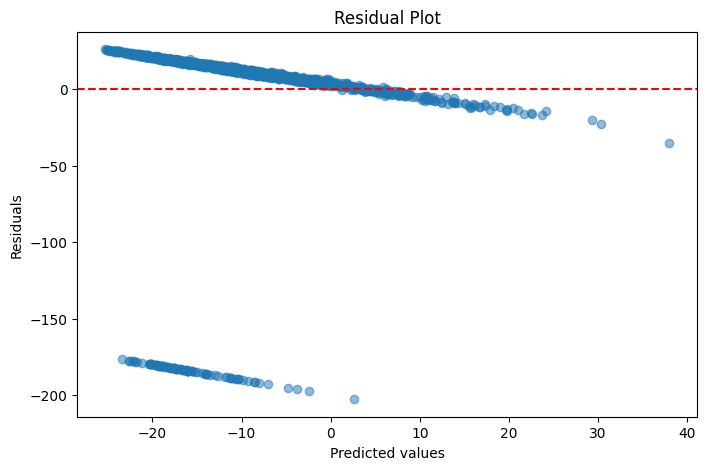

In [29]:
# Ensure y_test is numeric to avoid TypeError
y_test_numeric = pd.to_numeric(y_test, errors='coerce')
residuals = y_test_numeric - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()